# This is a notebook for Fig. 1 in Albright et al. in prep.

Elevation = PHIS / 9.8

In [6]:
import warnings

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps as gvcmaps
import geocat.viz.util as gvutil
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

warnings.filterwarnings("ignore")

## Read in files:

In [4]:
path = "/glade/u/home/malbright/nam_manuscript_figures/climatology_files_remapped"
topo_path = "/glade/derecho/scratch/malbright/FROM_CHEYENNE/remap/"
################################################
### Preindustrial:
################################################

#### low res

topo = xr.open_dataset(
    topo_path + "b.e13.B1850C5CN.ne30_g16.pi.001.cam.h0.ELEVATION.nc"
).elevation

#### high res
h_topo = xr.open_dataset(
    topo_path + "b.e13.B1850C5CN.ne120_g16.tuning.005.cam.h0.ELEVATION.nc"
).elevation

################################################
### Pliocene:
################################################

#### low res

topo_plio = xr.open_dataset(
    topo_path + "b.e13.B1850C5CN.ne30_g16.plio.001.cam.h0.PHIS.041301-042512.remap.nc"
).PHIS.isel(time=0)
topo_plio = topo_plio / 9.8

#### high res
h_topo_plio = xr.open_dataset(
    topo_path + "b.e13.B1850C5CN.ne120_g16.pliohiRes.002.cam.h0.PHIS.005901-006005.remap.nc"
).PHIS.isel(time=0)
h_topo_plio = h_topo_plio / 9.8

## Interpolate:

In [5]:
topo_on_hr = topo.interp(
    lat=h_topo["lat"],
    lon=h_topo["lon"],
    method="linear",
)

# Difference on the HR grid
diff = h_topo - topo_on_hr

# Optional: give them names for nicer plots / saving
topo_on_hr = topo_on_hr.rename("elevation_lr_on_hr")
diff = diff.rename("elevation_hr_minus_lr")

## Panel:

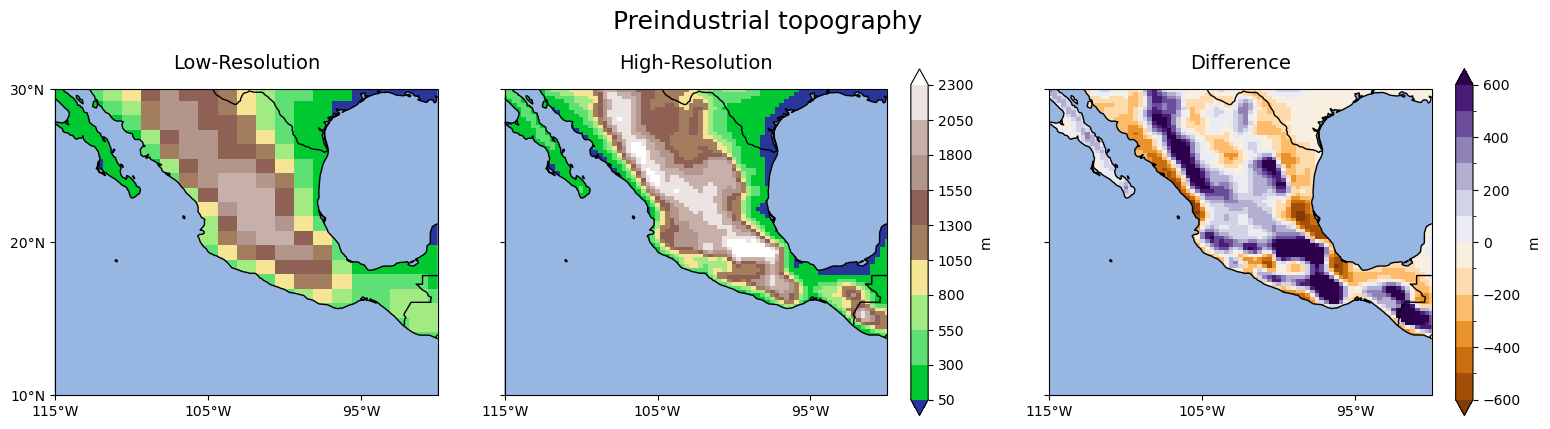

In [7]:
# Specify projection for maps
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(19, 5))
grid = fig.add_gridspec(
    ncols=3, nrows=1, width_ratios=[0.85, 1.061, 1.061], wspace=0.15, hspace=0.05
)

###############################
# TOP PANEL
###############################

# Create axis for LR
ax1 = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.OCEAN, zorder=2)
ax1.add_feature(cfeature.COASTLINE, zorder=4)
ax1.add_feature(cfeature.BORDERS)

# Create axis for HR
ax2 = fig.add_subplot(grid[0, 1], projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.OCEAN, zorder=2)
ax2.add_feature(cfeature.COASTLINE, zorder=4)
ax2.add_feature(cfeature.BORDERS)

# Create axis for difference
ax3 = fig.add_subplot(grid[0, 2], projection=ccrs.PlateCarree())
ax3.add_feature(cfeature.OCEAN, zorder=2)
ax3.add_feature(cfeature.COASTLINE, zorder=4)
ax3.add_feature(cfeature.BORDERS)

###############################
# FORMAT SUBPLOTS
###############################

# Format ticks and ticklabels for the map axes
for ax in [ax1, ax2, ax3]:
    gvutil.set_axes_limits_and_ticks(
        ax,
        xlim=(-115, -90),
        ylim=(10, 30),
        xticks=np.linspace(-130, -90, 13),
        yticks=np.linspace(15, 50, 7),
    )

ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_tick_params(labelleft=False)

ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_tick_params(labelleft=False)

###################################################
# PLOTS
###################################################

# LR

newcmp = gvcmaps.topo_15lev

# Define contour levels
levels = np.arange(50, 2550, 250)

# Define dictionary for kwargs
kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
    extend='both'
)

# Contouf-plot U data (for filled contours)
fillplot1 = topo.plot(ax=ax1, cmap=newcmp, **kwargs)

# Use geocat.viz.util convenience function to add titles to left and right of the plot axis.
gvutil.set_titles_and_labels(ax1, xlabel="", ylabel="", labelfontsize=14)

ax1.set_title("Low-Resolution", fontsize=14, loc="center", y=1.04)

# HR

# Contouf-plot U data (for filled contours)
fillplot2 = h_topo.plot(ax=ax2, cmap=newcmp, **kwargs)

cbar = fig.colorbar(fillplot2, shrink=0.9, label="m")

# Use geocat.viz.util convenience function to add titles to left and right of the plot axis.
gvutil.set_titles_and_labels(ax2, xlabel="", ylabel="")
ax2.set_title("High-Resolution", fontsize=14, loc="center", y=1.04)


# difference

diffcmp = gvcmaps.MPL_PuOr

diff_levels = np.arange(-600, 600.1, 100)
kwargs_diff = dict(
    levels=diff_levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
    extend='both'
)

fillplot_diff = diff.plot(ax=ax3, cmap=diffcmp, **kwargs_diff)

cbar_diff = fig.colorbar(fillplot_diff, shrink=0.9, label="m")

# Use geocat.viz.util convenience function to add titles to left and right of the plot axis.
gvutil.set_titles_and_labels(ax3, xlabel="", ylabel="")
ax3.set_title("Difference", fontsize=14, loc="center", y=1.04)

text_kwargs = dict(ha="center", va="center", fontsize=16, fontweight="bold")
# plt.text(-147, 56, 'a', **text_kwargs)
# plt.text(-117, 56, 'b', **text_kwargs)
# plt.text(-147, 31.5, 'c', **text_kwargs)
# plt.text(-117, 31.5, 'd', **text_kwargs)

fig.suptitle("Preindustrial topography", fontsize=18, y=0.96)

# Show the plot
plt.show()
# plt.savefig("figures/final_supplement_PI_topo.png", dpi=150, bbox_inches="tight")

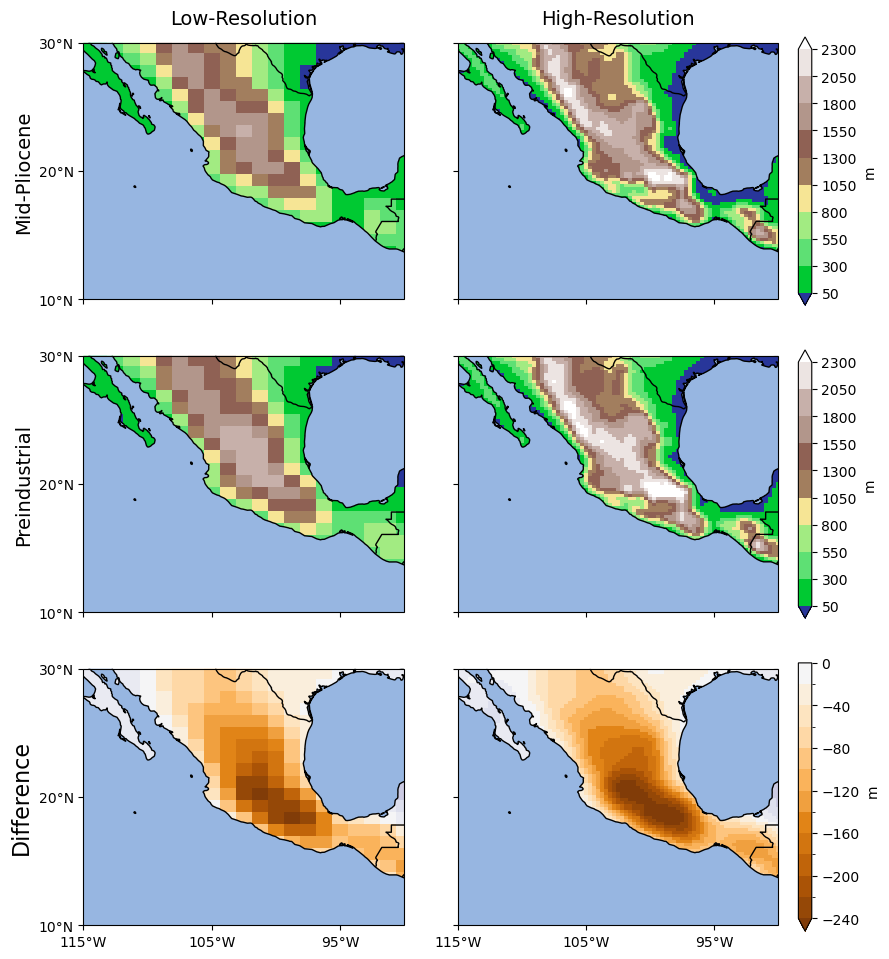

In [23]:
# Specify projection for maps
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(10, 12))
grid = fig.add_gridspec(
    ncols=2, nrows=3, width_ratios=[0.85, 1.061], wspace=0.15, hspace=0.05
)

###############################
# TOP PANEL
###############################

# Create axis for LR
ax1 = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(grid[0, 1], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(grid[1, 0], projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(grid[1, 1], projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(grid[2, 0], projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(grid[2, 1], projection=ccrs.PlateCarree())

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.add_feature(cfeature.OCEAN, zorder=2)
    ax.add_feature(cfeature.COASTLINE, zorder=4)
    ax.add_feature(cfeature.BORDERS)

###############################
# FORMAT SUBPLOTS
###############################

# Format ticks and ticklabels for the map axes
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    gvutil.set_axes_limits_and_ticks(
        ax,
        xlim=(-115, -90),
        ylim=(10, 30),
        xticks=np.linspace(-130, -90, 13),
        yticks=np.linspace(15, 50, 7),
    )

ax1.xaxis.set_tick_params(labelleft=False)
ax1.yaxis.set_major_formatter(LatitudeFormatter())

ax2.xaxis.set_tick_params(labelleft=False)
ax2.yaxis.set_tick_params(labelleft=False)

ax3.xaxis.set_tick_params(labelleft=False)
ax3.yaxis.set_major_formatter(LatitudeFormatter())

ax4.xaxis.set_tick_params(labelleft=False)
ax4.yaxis.set_tick_params(labelleft=False)

ax5.xaxis.set_major_formatter(LongitudeFormatter())
ax5.yaxis.set_major_formatter(LatitudeFormatter())

ax6.xaxis.set_major_formatter(LongitudeFormatter())
ax6.yaxis.set_tick_params(labelleft=False)

###################################################
# PLOTS
###################################################

##############
# CONFIG
##############

newcmp = gvcmaps.topo_15lev
# Define contour levels
levels = np.arange(50, 2550, 250)

# Define dictionary for kwargs
kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
    extend='both'
)

##############
# Plio
##############

# LR data
fillplot1 = topo_plio.plot(ax=ax1, cmap=newcmp, **kwargs)
gvutil.set_titles_and_labels(ax1, xlabel="", ylabel="Mid-Pliocene", labelfontsize=14)
ax1.set_title("Low-Resolution", fontsize=14, loc="center", y=1.04)

# HR data
fillplot2 = h_topo_plio.plot(ax=ax2, cmap=newcmp, **kwargs)
cbar = fig.colorbar(fillplot2, shrink=0.9, label="m")
gvutil.set_titles_and_labels(ax2, xlabel="", ylabel="")
ax2.set_title("High-Resolution", fontsize=14, loc="center", y=1.04)

##############
# PI
##############

# LR data
fillplot3 = topo.plot(ax=ax3, cmap=newcmp, **kwargs)
gvutil.set_titles_and_labels(ax3, xlabel="", ylabel="Preindustrial", labelfontsize=14)

# HR data
fillplot4 = h_topo.plot(ax=ax4, cmap=newcmp, **kwargs)
cbar2 = fig.colorbar(fillplot4, shrink=0.9, label="m")
gvutil.set_titles_and_labels(ax4, xlabel="", ylabel="")

##############
# DIFF
##############

diffcmp = gvcmaps.MPL_PuOr
diff_levels = np.arange(-240, 241, 20)
kwargs_diff = dict(
    levels=diff_levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
    extend='min'
)

# LR
diff = topo_plio - topo
fillplot_diff = diff.plot(ax=ax5, cmap=diffcmp, **kwargs_diff)
gvutil.set_titles_and_labels(ax5, xlabel="", ylabel="Difference")
ax5.set_title("")

# HR
hr_diff = h_topo_plio - h_topo
fillplot_diff_h = hr_diff.plot(ax=ax6, cmap=diffcmp, **kwargs_diff)
cbar_diff = fig.colorbar(fillplot_diff_h, ticks=diff_levels[::2], shrink=0.9, label="m")
cbar_diff.ax.set_ylim(-240, 0)
gvutil.set_titles_and_labels(ax6, xlabel="", ylabel="")
ax6.set_title("")


text_kwargs = dict(ha="center", va="center", fontsize=16, fontweight="bold")
# plt.text(-147, 56, 'a', **text_kwargs)
# plt.text(-117, 56, 'b', **text_kwargs)
# plt.text(-147, 31.5, 'c', **text_kwargs)
# plt.text(-117, 31.5, 'd', **text_kwargs)

# fig.suptitle("Preindustrial topography", fontsize=18, y=0.96)

# Show the plot
# plt.show()
plt.savefig("figures/final_supplement_MP_PI_topo.png", dpi=150, bbox_inches="tight")